In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, ArrowStyle
%matplotlib widget

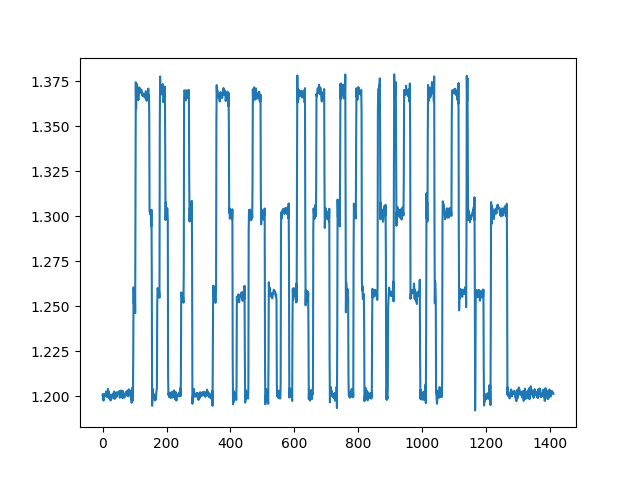

In [38]:
sig = np.fromfile("rfid2.cf32", dtype=np.complex64)

plt.figure()
plt.plot(np.abs(sig))
plt.show()

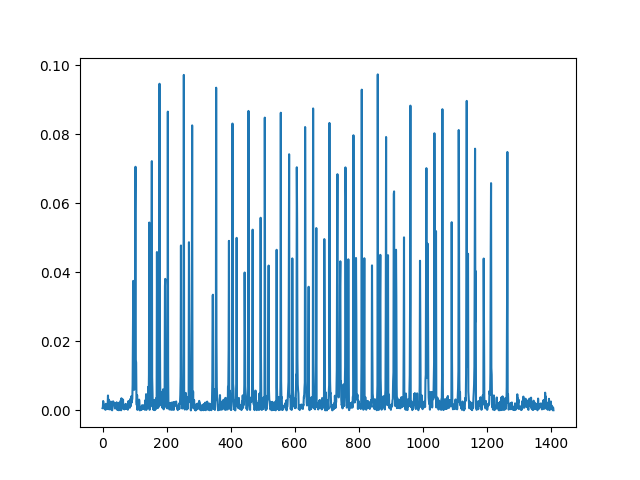

In [39]:
plt.figure()
plt.plot(np.abs(np.diff(np.abs(sig))))
plt.show()

idx = np.where(np.abs(np.diff(np.abs(sig))) < 0.006)[0]
idx += 1

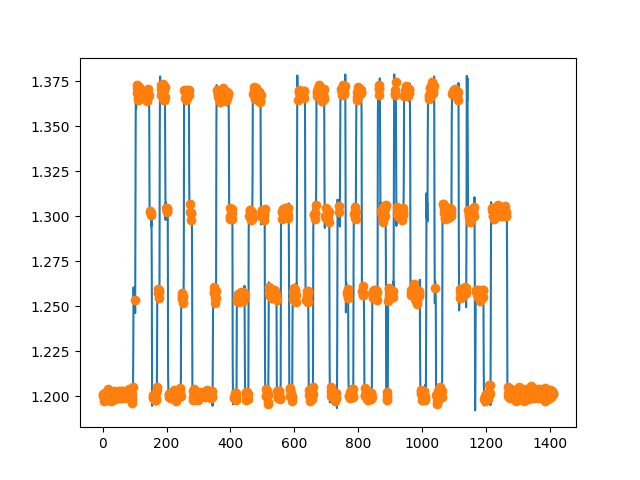

In [40]:
plt.figure()
plt.plot(np.abs(sig))
plt.plot(idx, np.abs(sig)[idx], "o")
plt.show()

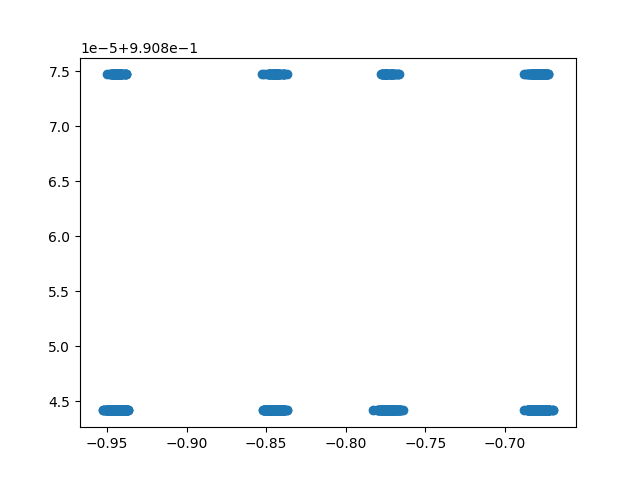

In [41]:
cluster = sig[idx]
plt.figure()
plt.scatter(np.real(cluster), np.imag(cluster))
plt.show()

In [42]:
from sklearn.cluster import KMeans

data = np.array([cluster.real, cluster.imag]).T

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)
labels = kmeans.labels_
print(list(labels))
clustering_centers = kmeans.cluster_centers_
print(clustering_centers)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

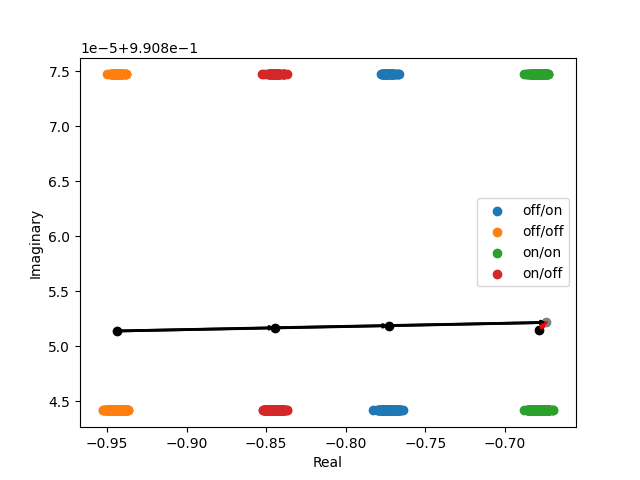

[4.695952e-03 6.556511e-07]


In [49]:
off_on = data[labels == 3]
off_off = data[labels == 2]
on_on = data[labels == 0]
on_off = data[labels == 1]

off_on_center = clustering_centers[3]
off_off_center = clustering_centers[2]
on_on_center = clustering_centers[0]
on_off_center = clustering_centers[1]

expected_on_on_center = (off_on_center - off_off_center) + (on_off_center - off_off_center) + off_off_center

def plot_arrow(ax: plt.Axes, start, end, color="black", label=None):
    arrow = FancyArrowPatch(
        start,
        end,
        arrowstyle=ArrowStyle("-|>", head_length=2, head_width=1),
        color=color,
        zorder=2,
        shrinkA=0,
        shrinkB=0,
        linewidth=2,
    )
    if label is not None:
        ax.plot([], [], color=color, label=label)
    ax.add_artist(arrow)


plt.figure()
plt.scatter(off_on[:, 0], off_on[:, 1], label="off/on")
plt.scatter(off_off[:, 0], off_off[:, 1], label="off/off")
plt.scatter(on_on[:, 0], on_on[:, 1], label="on/on")
plt.scatter(on_off[:, 0], on_off[:, 1], label="on/off")
plt.legend()
plt.scatter(clustering_centers[:, 0], clustering_centers[:, 1], c="black")
plt.scatter(expected_on_on_center[0], expected_on_on_center[1], c="gray")
plot_arrow(plt.gca(), off_off_center, off_on_center, color="black")
plot_arrow(plt.gca(), off_off_center, on_off_center, color="black")
plot_arrow(plt.gca(), off_on_center, expected_on_on_center, color="black")
plot_arrow(plt.gca(), on_off_center, expected_on_on_center, color="black")
plot_arrow(plt.gca(), expected_on_on_center, on_on_center, color="red")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.show()
print(expected_on_on_center - on_on_center)

In [50]:
4e-3

0.004